# 解答例：Week3 授業前課題2 住宅情報の分析

## エイムズ市の住宅価格

アイオワ州エイムズ市の住宅価格データセットを使い、基本的なデータの扱い方を学んでいきます。

住宅に関する79種類もの説明変数が用意されているため、それらと価格との関係を探索していきましょう。

エイムズがどのような街なのかもWikipediaなどで確認しておくと良いでしょう。

[Ames, Iowa - Wikipedia](https://en.wikipedia.org/wiki/Ames,_Iowa)

## Kaggleのカーネル

Kaggleでは「カーネル」としていろいろな人がデータ探索（EDA）を行ったコードが共有されています。良いEDAをたくさん見て、ノウハウを吸収していきましょう。今回の課題をやる上でも参考にしたり、課題になっていないことに挑戦したりしてください。

これ以降Kaggleを利用していきますので、アカウントを作成してください。

**＜参考カーネル＞**

[Comprehensive data exploration with Python &#124; Kaggle](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)（まずはここから）

[House Prices : EDA to ML (Beginner) &#124; Kaggle](https://www.kaggle.com/dejavu23/house-prices-eda-to-ml-beginner)


[A Home for Pandas and Sklearn: Beginner How-Tos &#124; Kaggle](https://www.kaggle.com/timolee/a-home-for-pandas-and-sklearn-beginner-how-tos)

## データセットの準備

データセットはKaggleからダウンロードします。

[House Prices: Advanced Regression Techniques &#124; Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

上記URLを開き、Dataのページへ移動してください。

[![Image from Gyazo](https://t.gyazo.com/teams/diveintocode/110c4ffdae2dba11c843ea21e97ff903.png)](https://diveintocode.gyazo.com/110c4ffdae2dba11c843ea21e97ff903)

この中の`train.csv`を使用します。これをダウンロードし、Jupyter Notebookで使っているディレクトリに置いてください。

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

### 【問題1】データセットの取得

`pd.read_csv()`を使用して、変数に格納してください。

In [2]:
df = pd.read_csv("train.csv")

### 【問題2】データセット自体の調査

KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。


（解答例）

アメリカのアイオワ州エイムズ市にある住宅の79種類の情報と価格に関するデータセットである。

2006年から2010年に集められたデータで、2011年に発表されている。

住宅情報データセットとしてはボストンのものがあるが、これの近代的なものとして使うことができる。

次のような情報が含まれる。

- 住宅の場所に関する情報（周りの道路についてなど）
- 建物に関する情報（築年、広さなど）
- 設備に関する情報（バスルームの大きさ、ガレージの状態など）

## データの概観

### 【問題3】データの確認

データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。

- 各特徴量がどういったものかを見る。（数値データか文字データなど）
- 今回の目的変数はどの列か確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

「各特徴量がどういったものかを見る。（数値データか文字データなど）」

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

整数、文字列が中心で浮動小数点数の列もある。サンプル数は1460だが、欠損が多い列もある。

「今回の目的変数はどの列か確認する。」

In [5]:
df["SalePrice"].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

列SalePriceが住宅の価格で、目的変数である。コンペティションのページによると単位はドル。

「特徴量の平均値と標準偏差、四分位数を一度に表示させる。」

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


整数で表現されているカテゴリ変数に関しはこの表はあまり意味がない。

意味のあるものとしては例えば築年（YearBuilt）で、1872年から2010年の範囲で、中央値が1973年であることが分かった。Wikipediaによると町の形成は1864年の鉄道駅開業からということなので、そのころからの物件のデータも含まれていることになる。データを集めたのは2006年から2010年であるため、新築物件も含まれていることになりそうである。

その隣には改装年（YearRemodAdd）があるが、欠損値がなく最新は2010年ということで、改装していない家に関しては築年の値が入っていそうであることが分かった。

その他面積などの情報は役に立ちそうである。例えばプールの面積は75%でも0であり、プールがない住宅の方が多いことが分かった。

目的変数のSalePriceは最安値34900ドル、最高値755000ドルであった。25%が129975ドル、75%が214000ドルだから大体この範囲の住宅が多そうであった。

### 発展

特徴量ごとにデータの種類が異なることを確認しておきます。

**名義尺度・順序尺度・間隔尺度・比例尺度** の4種類の例を紹介します。

名義尺度と順序尺度は質的変数（カテゴリ変数）、間隔尺度と比例尺度は量的変数とまとめることもできます。

まず、OverallQualは家全体の質を表現している列で、これは以下のように整数が入っています。

In [7]:
df.loc[:, ["OverallQual"]].head()

,OverallQual
0,7
1,6
2,7
3,7
4,8


これに関してはコンペティションのDataページに説明が載っています。10段階の評価を整数で表現しているようです。こういったものを **カテゴリ変数** 、または **質的変数** と呼びます。カテゴリ変数の中でもこれは順序には意味がありますので **順序尺度** です。

```
10   Very Excellent
  9    Excellent
  8    Very Good
  7    Good
  6    Above Average
  5    Average
  4    Below Average
  3    Fair
  2    Poor
  1    Very Poor
```

一方でBsmtQualは地下室の高さを表現している列ですが、これは以下のように4種類の文字列と欠損値nanで構成されています。

In [8]:
print("BsmtQualの最初の5サンプル")
display(df["BsmtQual"].head())
print("BsmtQualの持つカテゴリ：{}".format(df["BsmtQual"].unique()))

BsmtQualの最初の5サンプル


0    Gd
1    Gd
2    Gd
3    TA
4    Gd
Name: BsmtQual, dtype: object

BsmtQualの持つカテゴリ：['Gd' 'TA' 'Ex' nan 'Fa']


Dataページの説明では以下のようになっています。高さですから数値として扱えるものですが、ここではそれを何段階かの質として表しています。これも **順序尺度** と考えられます。

OverallQualもBsmtQualも質ですが、片方は整数、片方は文字列で記録されている点には気をつける必要があります。こういったデータには必要に応じて **前処理** をすることになります。

```
Ex   Excellent (100+ inches) 
Gd   Good (90-99 inches)
TA   Typical (80-89 inches)
Fa   Fair (70-79 inches)
Po   Poor (&lt;70 inches
NA   No Basement
```

説明によるとPoという分類もありますが、今みているcsvにはこれは含まれていませんでした。

Neighborhodには家のある区画の名前の略称が記録されています。

これもカテゴリ変数ですが、順序には意味がないため **名義尺度** になります。

In [9]:
df["Neighborhood"].head()

0    CollgCr
1    Veenker
2    CollgCr
3    Crawfor
4    NoRidge
Name: Neighborhood, dtype: object

YearBuilt（築年）のようなデータは、 **間隔尺度** です。築年は値の間隔に意味があります。

数値が入っているデータでも例えばPoolArea（プール面積）は **比例尺度** です。間隔に加えて、比率に意味があります。比例尺度は原点を持ちます。

間隔尺度のYearBuilt（築年）の場合1950年は1900年の1.026倍であるといった風に捉えても意味はありません。しかし、YearBuilt（築年）を築年数に変換すれば、比例尺度に変化します。築10年は築5年の2倍と言うことができます。築年数を求めるには現在の年という原点の情報を外から加えることになるため、こちらの方がより役に立つ可能性があります。

間隔尺度と比例尺度を合わせて **量的データ** と呼びます。

### 【問題4】欠損値への対応

欠損値に関して以下のことを行い、レポートしてください。

- 各特徴量の欠損値の有無を確認する。

欠損値の確認には`missingno`というライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。

[ResidentMario/missingno: Missing data visualization module for Python.](https://github.com/ResidentMario/missingno)

- 欠損値が何パーセント含まれるかを確認する。

（例）

|　|Total| missing_ratio|
:---:|:---:|:---:
|PoolQC|1453 | 0.995205|
|MiscFeature| |
|Alley|  |
|Fence|  |
|：|：|

- 5つ以上欠損値がある特徴量（列）は削除する。
- 欠損値があるサンプル（行）は削除する。

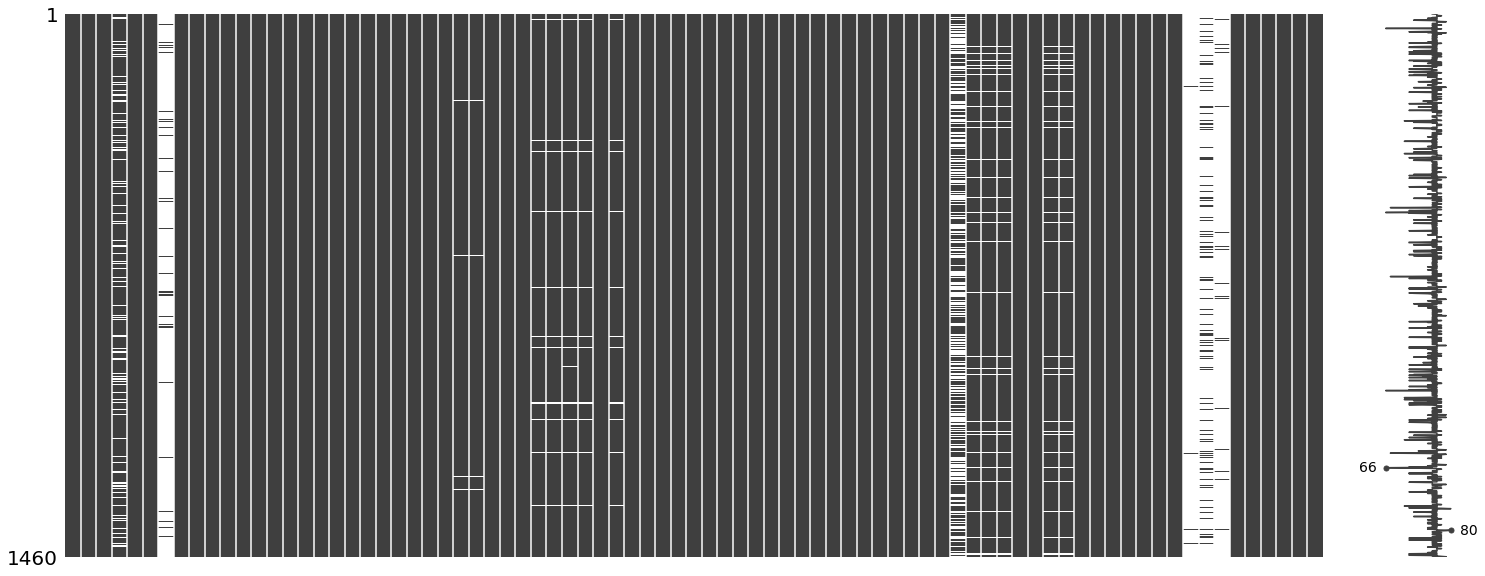

In [10]:
import missingno as msno
# 全体像を見る
msno.matrix(df)

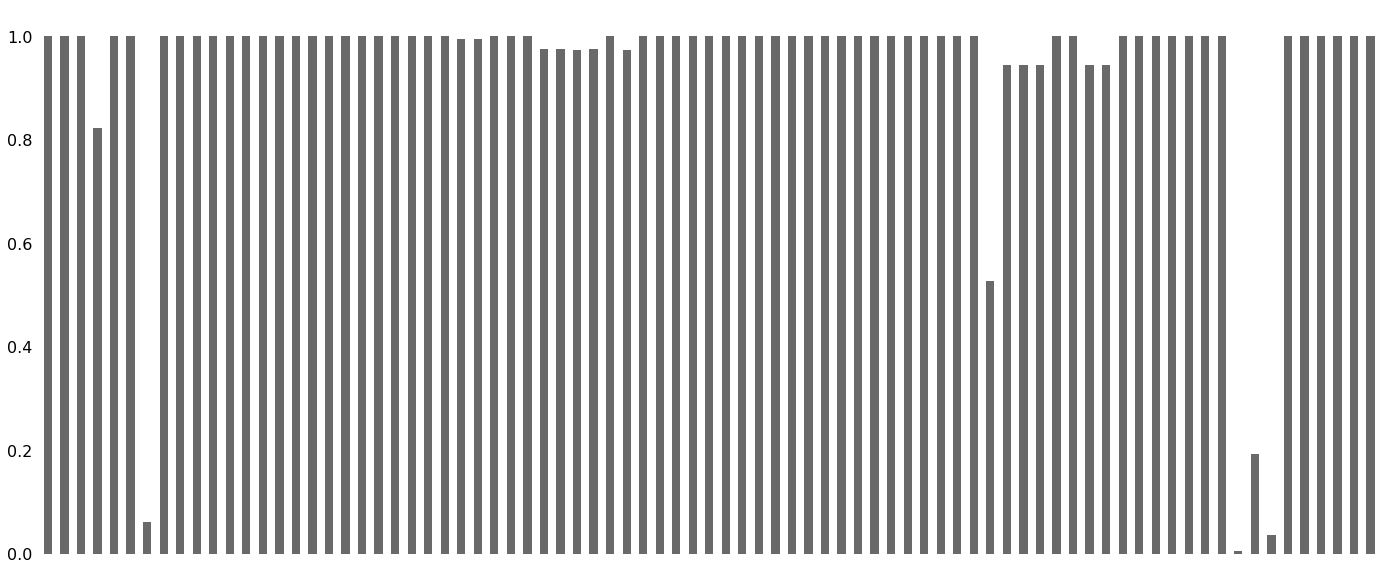

In [11]:
# 特徴量ごとの欠損していない割合を見る
msno.bar(df)

In [12]:
threshold = 0 # この値以下の欠損率の特徴量は表示しない
n_samples = len(df)
missing_rate = df.isnull().sum() / n_samples * 100
print("欠損率が{}%より高い特徴量の一覧\n{}".format(threshold, missing_rate[missing_rate>threshold]))

欠損率が0%より高い特徴量の一覧
LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [13]:
threshold = 0 # この値以下の欠損率の特徴量は表示しない
n_missing = df.isnull().sum() 
print("欠損数が{}より多い特徴量の一覧\n{}".format(threshold, n_missing[n_missing>threshold]))

欠損数が0より多い特徴量の一覧
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [14]:
df_missing = pd.concat([n_missing, missing_rate], axis=1)
df_missing = df_missing.rename(columns={0: 'total', 1: 'missing_ratio'})
df_missing = df_missing.query("total>0 and missing_ratio>0")
display(df_missing)

,total,missing_ratio
LotFrontage,259,17.739726
Alley,1369,93.767123
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtFinType2,38,2.602740
Electrical,1,0.068493


In [15]:
threshold = 5
many_missing_features = df_missing.query("total >= {}".format(threshold)).index
print("欠損が{}個以上ある特徴量の一覧：\n{}".format(threshold, many_missing_features))

欠損が5個以上ある特徴量の一覧：
Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')


In [16]:
# 欠損が5個以上ある列を削除する
df_dropped_features = df.drop(many_missing_features, axis=1)
display(df_dropped_features.head())

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


残っているサンプル数：1459


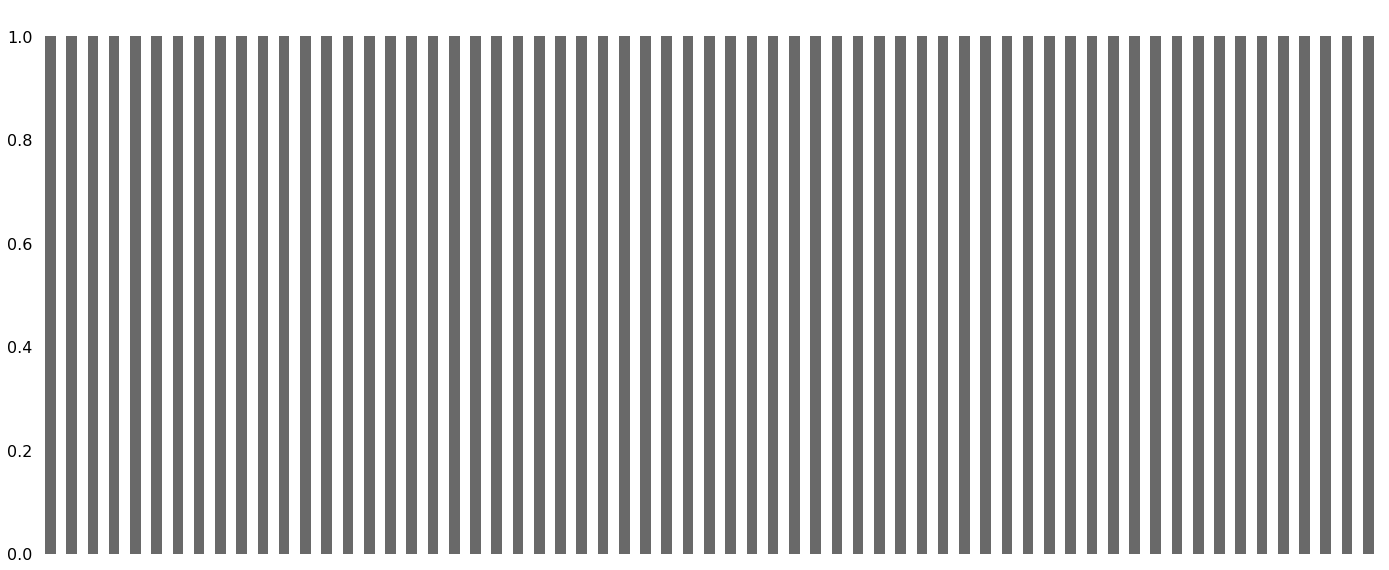

In [17]:
# 欠損の多い特徴量を消した上で、さらに欠損がある行を削除する。
df_dropna = df_dropped_features.dropna(axis=0)
df_dropna = df_dropna.reset_index(drop=True)
print("残っているサンプル数：{}".format(len(df_dropna)))
msno.bar(df_dropna) # 欠損がないことを確認

## 目的変数

次は目的変数がどのような分布を持っているか確認していきます。  

### 【問題5】用語の調査

以下の２つの単語を知る必要があります。これらを調査してまとめてください。

- 尖度
- 歪度

### 【問題6】分布の確認

- seabornの`sns.distplot()`を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
- 目的変数に対して対数変換を行う。
- 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。  

[seaborn.distplot — seaborn 0.9.0 documentation](https://seaborn.pydata.org/generated/seaborn.distplot.html)


歪度=1.88  尖度=6.54


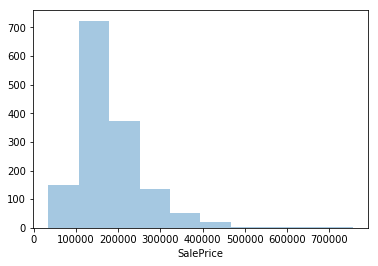

In [18]:
target = df["SalePrice"]
print("歪度={:.2f}  尖度={:.2f}".format(target.skew(), target.kurtosis()))
display(sns.distplot(target, kde=False, rug=False, bins=10))

歪度=0.12  尖度=0.81


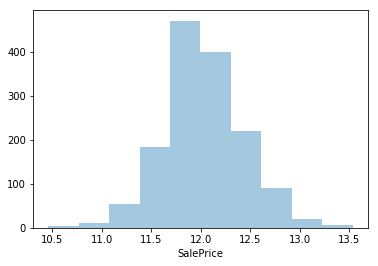

In [19]:
# 対数変換
target_log = target.apply(np.log)

print("歪度={:.2f}  尖度={:.2f}".format(target_log.skew(), target_log.kurtosis()))
display(sns.distplot(target_log, kde=False, rug=False, bins=10))

元のデータでは尖度が6.53であったが、対数変換により尖度が0.81となった。分布が正規分布に近くなった。

## 特徴量

### 【問題7】相関係数の確認

特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。

- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

**補足**

重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。


（解説）

相関係数のメソッドはデフォルトではピアソンの相関係数を計算しています。これは連続値に対して定義されています。そのため、相関係数の計算は各特徴量の性質を確認した上で行う必要があります。例えば、カテゴリ変数の整数に対しても計算ができてしまいますが、それは意味がありません。

しかし現状の課題としてはそこは深めず、全てに対して`corr`メソッドを適用させます。

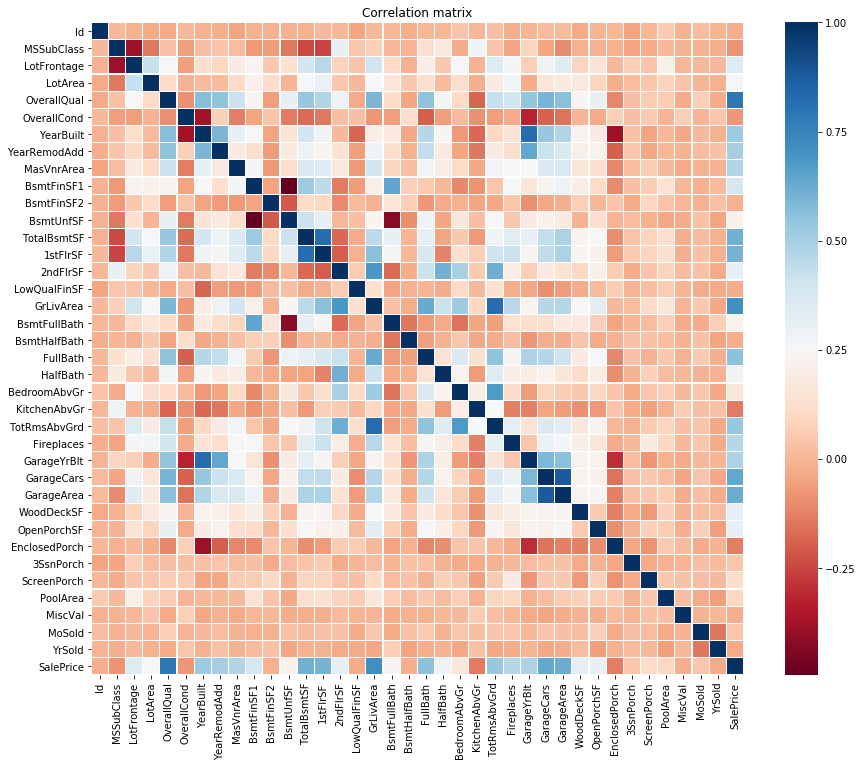

In [20]:
# 相関係数行列のヒートマップを作る

df_corr = df.corr()

colormap = plt.cm.RdBu
plt.subplots(figsize=(15, 12))
plt.title('Correlation matrix')
sns.heatmap(df_corr,linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=False)
plt.show()

In [21]:
# SalePriceとの相関をソート
df_corr_saleprice  = df_corr["SalePrice"].sort_values(ascending=False)
print(df_corr_saleprice[1:11])

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1710,2,548,856,856,2,8,2003,2003
1,6,1262,2,460,1262,1262,2,6,1976,1976
2,7,1786,2,608,920,920,2,6,2001,2002
3,7,1717,3,642,756,961,1,7,1915,1970
4,8,2198,3,836,1145,1145,2,9,2000,2000


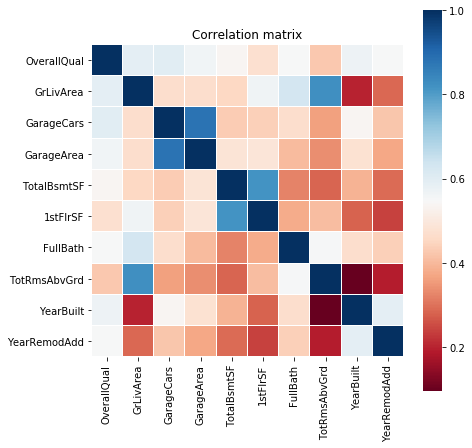

In [22]:
df_high_corr_saleprice = df[df_corr_saleprice[1:11].index]
display(df_high_corr_saleprice.head())

df_high_corr_saleprice_corr = df_high_corr_saleprice.corr()

colormap = plt.cm.RdBu
plt.subplots(figsize=(7, 7))
plt.title('Correlation matrix')
sns.heatmap(df_high_corr_saleprice_corr,linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=False)
plt.show()

In [23]:
df_high_corr_saleprice_corr

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
OverallQual,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684
GrLivArea,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389
GarageCars,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622
GarageArea,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600
TotalBsmtSF,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066
1stFlrSF,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379
FullBath,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046
TotRmsAbvGrd,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740
YearBuilt,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855
YearRemodAdd,0.550684,0.287389,0.420622,0.371600,0.291066,0.240379,0.439046,0.191740,0.592855,1.000000
